In [379]:
import numpy as np
import pandas as pd

### List the CSV files we have

In [380]:
!ls *.csv

yellow_tripdata_2019-07.csv  yellow_tripdata_2020-07.csv


### Load multiple csv files and merge them
We are using specific columns  
We also change the type of specific columns   
These two actions reduce the memory usage  

In [381]:
import glob

all_dfs = []
for f in glob.glob('*.csv'):
    mdf = pd.read_csv(f,
                 usecols=['tpep_pickup_datetime',
                           'tpep_dropoff_datetime',
                           'passenger_count',
                           'tip_amount',
                           'congestion_surcharge',
                           'total_amount'],
                dtype={'trip_distance': np.float16,
                       'tip_amount': np.float32,
                       'total_amount': np.float16})
    all_dfs.append(mdf)
df = pd.concat(all_dfs)    

### Check for N/A 

In [382]:
df.isna().any()

tpep_pickup_datetime     False
tpep_dropoff_datetime    False
passenger_count           True
tip_amount               False
total_amount             False
congestion_surcharge     False
dtype: bool

### Replace N/A values by 0

In [383]:
df.passenger_count = df.passenger_count.fillna(0)

### Or we can drop any rows with N/A in any of the columns

In [384]:
df.dropna(inplace=True)

### Change Data Types

In [385]:
df['passenger_count'] = df['passenger_count'].astype('int8')

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

### Check the number of rows and columns in the data set

In [386]:
df.shape

(7110831, 6)

### Show the first rows in the data set

In [387]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,tip_amount,total_amount,congestion_surcharge
0,2020-07-01 00:25:32,2020-07-01 00:33:39,1,0.00,9.296875,0.0
1,2020-07-01 00:03:19,2020-07-01 00:25:43,1,0.00,27.796875,0.0
2,2020-07-01 00:15:11,2020-07-01 00:29:24,1,0.00,22.296875,2.5
3,2020-07-01 00:30:49,2020-07-01 00:38:26,1,2.36,14.156250,2.5
4,2020-07-01 00:31:26,2020-07-01 00:38:02,1,0.00,7.800781,0.0


In [388]:
df.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                    int8
tip_amount                      float32
total_amount                    float16
congestion_surcharge            float64
dtype: object

### Get info about the data set include real memory consumptuin

In [389]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7110831 entries, 0 to 6310418
Data columns (total 6 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   passenger_count        int8          
 3   tip_amount             float32       
 4   total_amount           float16       
 5   congestion_surcharge   float64       
dtypes: datetime64[ns](2), float16(1), float32(1), float64(1), int8(1)
memory usage: 264.5 MB


### Check for duplicates

In [390]:
df.duplicated().any()


True

### Show duplicated rows

In [391]:
df[df.duplicated()]


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,tip_amount,total_amount,congestion_surcharge
313314,2020-07-15 15:31:30,2020-07-15 15:34:37,1,0.00,7.300781,2.5
738035,2020-07-07 15:55:51,2020-07-07 16:07:06,0,1.43,15.726562,2.5
738314,2020-07-08 20:02:31,2020-07-08 20:07:28,0,1.03,11.328125,2.5
738526,2020-07-09 23:33:23,2020-07-09 23:54:44,0,6.96,41.750000,0.0
739194,2020-07-19 14:50:54,2020-07-19 14:55:20,0,1.96,11.757812,2.5
...,...,...,...,...,...,...
6161453,2019-07-31 14:43:36,2019-07-31 14:54:41,1,2.36,14.156250,2.5
6195203,2019-07-31 17:06:27,2019-07-31 17:23:26,1,0.00,15.796875,2.5
6223515,2019-07-31 19:06:44,2019-07-31 19:26:33,1,3.46,20.765625,2.5
6252188,2019-07-31 21:10:00,2019-07-31 21:19:26,1,0.00,11.796875,2.5


### Drop duplicates

In [392]:
df.drop_duplicates(inplace=True)

In [393]:
df.shape

(7110342, 6)

### Add a Year column based on the pickup date



In [394]:
df['year'] = df['tpep_pickup_datetime'].dt.year

In [395]:
df['year'].value_counts()

2019    6310252
2020     800034
2009         33
2008         13
2002          9
2010          1
Name: year, dtype: int64

### Finding the maximum tip

In [396]:
df.tip_amount.max()

1001.0

### Finding rows with maximum tip

In [397]:
df[df['tip_amount'] == df.tip_amount.max()]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,tip_amount,total_amount,congestion_surcharge,year
31607,2020-07-02 12:50:12,2020-07-02 12:55:46,1,1001.0,1011.0,2.5,2020


### Find if there is any negative Tip value

In [398]:
df.loc[df['tip_amount'] < 0, 'tip_amount'].count()

247

### Get the average Tip 

In [399]:
df['tip_amount'].mean()


2.1397335529327393

### Get the average Tip excluding the negative values

In [400]:
df.loc[df['tip_amount'] > 0, 'tip_amount'].mean()

3.2183868885040283

### Show the distribution of tip values

In [401]:
df.loc[df['tip_amount'] > 0, 'tip_amount'].value_counts()

1.000000     372950
2.000000     259211
1.500000      89907
2.060000      86228
1.960000      83957
              ...  
38.110001         1
32.040001         1
49.910000         1
46.860001         1
27.490000         1
Name: tip_amount, Length: 3740, dtype: int64

In [402]:
df.loc[df['tip_amount'] > 0, 'tip_amount'].value_counts()

1.000000     372950
2.000000     259211
1.500000      89907
2.060000      86228
1.960000      83957
              ...  
38.110001         1
32.040001         1
49.910000         1
46.860001         1
27.490000         1
Name: tip_amount, Length: 3740, dtype: int64

### Show tips distribution in percentage

In [407]:
pd.cut(df['tip_amount'], [1,2,5,10,20,50,100,500,1000], ordered=True).value_counts(normalize=True)*100

(2, 5]         57.867760
(1, 2]         28.510600
(5, 10]         9.694354
(10, 20]        3.751972
(20, 50]        0.158213
(50, 100]       0.014453
(100, 500]      0.002647
(500, 1000]     0.000000
Name: tip_amount, dtype: float64

### Creat a new column for Tip size with 'category' data type

In [410]:
df['tip_size'] = df.apply(lambda row: 'Big' if row.tip_amount > 5 else 'Small',axis=1)
df['tip_size'] = df['tip_size'].astype('category')


In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7110342 entries, 0 to 6310418
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   passenger_count        int8          
 3   tip_amount             float32       
 4   total_amount           float16       
 5   congestion_surcharge   float64       
 6   year                   int64         
 7   tip_size               category      
dtypes: category(1), datetime64[ns](2), float16(1), float32(1), float64(1), int64(1), int8(1)
memory usage: 325.5 MB


### Big and small tips count

In [412]:
df['tip_size'].value_counts()

Small    6528843
Big       581499
Name: tip_size, dtype: int64

### Distribtion of Big and small Tips

In [413]:
df['tip_size'].value_counts(normalize=True)

Small    0.918218
Big      0.081782
Name: tip_size, dtype: float64

<AxesSubplot:xlabel='tip_amount', ylabel='Count'>

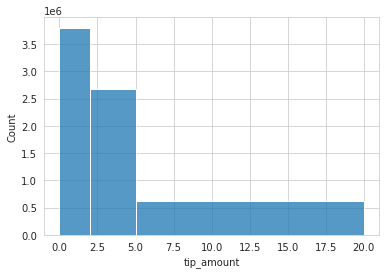

In [414]:
import seaborn as sns

sns.histplot(df.tip_amount, bins=[0,2,5,20])